<a href="https://colab.research.google.com/github/Steven-Macas/ArbolDecision/blob/main/vino_SAA_stevenMacas_Arbol_Decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Algoritmos de aprendizaje supervisado**

---

## Árbol de Decisión

Realizar estudios de aprendizaje supervisado utilizando árboles de decisión, tanto para clasificación
como para regresión. Para ello en esta tarea se usarán 4 datasets (los tres de la práctica anterior y uno
que introduce series temporales).

1. https://www.kaggle.com/yasserh/wine-quality-dataset . Clasificación de la calidad del vino según
alguno de sus parámetros (ph, densidad, sulfatos, alcohol, azúcar, etc.). El dataset contiene una serie de
datos sobre unos vino y su calidad (de 0 a 10). Este problema es de clasificación puesto que consiste en
clasificar el vino en concreto en su clase de calidad (valores discretos del cero al 10)

2. https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction. Clasificación binaria. El
objetivo es clasificar entre presencia de enfermedad del corazón o no a partir de una serie de atributos
(edad, sexo, colesterol, etc.). Para ello el dataset contiene una serie de datos pacientes etiquetados si
tienen enfermedad o no.

3. https://www.kaggle.com/schirmerchad/bostonhoustingmlnd. Predicción de precios de las casas de
Boston. El dataset contiene una serie de datos de casas. El objetivo es, dada una serie de parámetros,
predecir el precio que debe tener la casa (MEDV).

4. https://www.kaggle.com/marklvl/bike-sharing-dataset. Predicción de número de bicicletas alquiladas
por cada hora. El dataset contiene una serie de datos como temperatura, humedad, si es día laborable,
etc. El objetivo es predecir cuantas bicicletas se van a alquilar dependiendo de esa serie de parámetros.

Para cada uno de ellos realizar un documento de google colab con los siguientes epígrafes y tareas:


---


A Importación de librerías necesarias


---



B Preproceso

◦ Importación de los datos del dataset

◦ Mostrar las primeras y últimas filas del dataframe importado

◦ Mostrar parámetros estadísticos de los datos (media, desviación típica, cuartiles, etc.)

◦ Mostrar un mapa de calor que indique la correlación entre variables

◦ Seleccionar las características a tener en cuenta en el estudio

◦ Separar datos entre datos de entrada y etiquetas (resultados)

◦ Separar datos entre entrenamiento y prueba (usando un 80% para entrenamiento y 20% para test)


---



C Entrenamiento y predicción

◦ Elegir, instanciar (eligiendo unos valores concretos, por ejemplo profundidad del árbol 3) y entrenar el modelo

◦ Realizar una predicción con los datos de prueba

◦ Mostrar el árbol de decisión resultante

◦  Mostrar la importancia de cada atributo en el árbol resultante

◦ Intenta guardar el modelo de predicción ya entrenado usando dumpo:

*https://scikit-learn.org/stable/modules/model_persistence.html*

---


D Evaluación

◦Para los problemas de clasificación

*   Mostrar el porcentaje de elementos correctamente clasificados
*   Mostrar la predicción realizada (imprimir la variable con la predicción)
*   Representar gráficamente la clasificación obtenida (matriz de confusión)

◦Para los problemas de regresión

*   Mostrar el error cuadrático medio (mean_squared_error)
*   Mostrar el error absoluto medio (mean_absolute_error)
*   Representar gráficamente los valores predichos con los valores reales

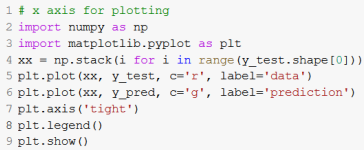

---


E Optimización de hiperparámetros

◦  Calcula la combinación de parámetros óptima (profundidad de árbol y criterio. Para ello realiza ejecuciones con cada uno de los valores del criterio para los valores de profundidad de árbol de 1 a 15

◦Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits = 5). Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)), como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

◦Finalmente los parámetros elegidos serán los que den mejor media de esas medidas anteriormente nombradas.

◦ Una vez obtenidos esos parámetros óptimos los aplicaremos al problema en cuestión y mostraremos los resultados.

---

# **A** -Importación de librerías

In [ ]:
#Importamos las librerias necesarias
import pydot #DecisionTree
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree #DecisionTree
from io import StringIO #DecisionTree
import matplotlib.pyplot as plt #Para el mapa de calor, hacer celdas grandes
from IPython.display import Image #DecisionTree
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier #DecisionTree
from sklearn.tree import DecisionTreeRegressor #DecisionTree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import ConfusionMatrixDisplay

---


# **B** - Preproceso

In [ ]:
data = pd.read_csv('heart.csv') #Dataset del vino



---



In [ ]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object



---



In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


---

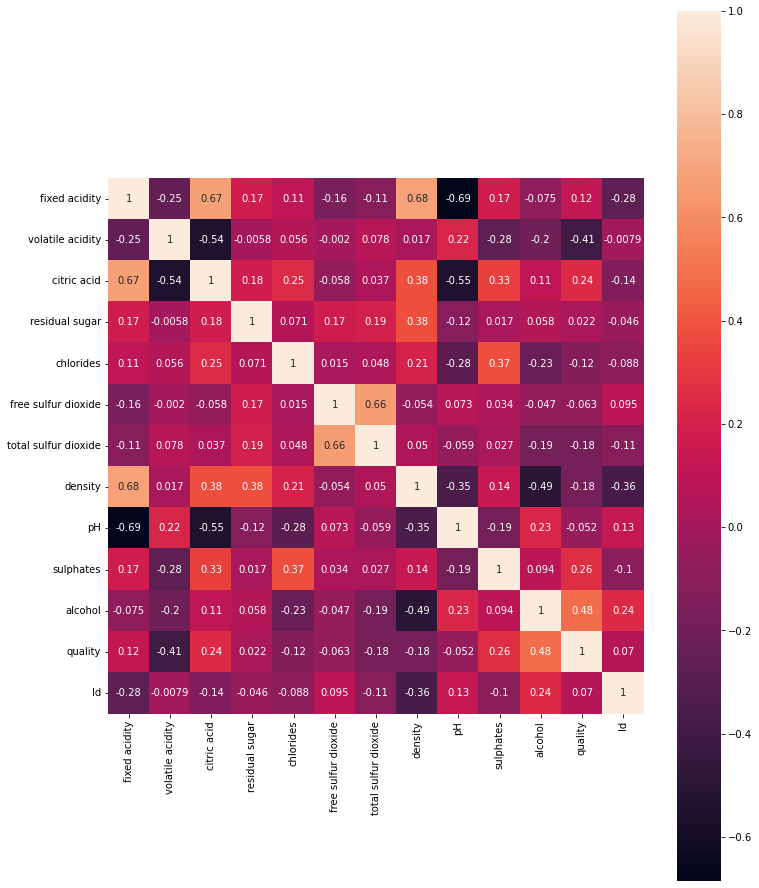

In [ ]:
#Mapa de Calor del DataFrame del Vino
plt.figure(figsize=(12, 16))
map_calor = sns.heatmap(data.corr(),square = True, annot = True)
map_calor

---

**La característica que tendremos en cuenta para el estudio será la Calidad del vino**



In [ ]:
#separamos datos de entrada y salida Vino
x_data = data.drop('quality', axis=1)
y_data = data['quality']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.80)

# **C** - Entrenamiento y Predicción

In [ ]:
arbol = DecisionTreeClassifier(criterion = 'gini', max_depth=3) 
arbol.fit(x_train,y_train) 
y_predict = arbol.predict(x_test)

In [ ]:
x_data.columns.values

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'Id'], dtype=object)

In [ ]:
y_data.values

array([5, 5, 5, ..., 5, 6, 5])

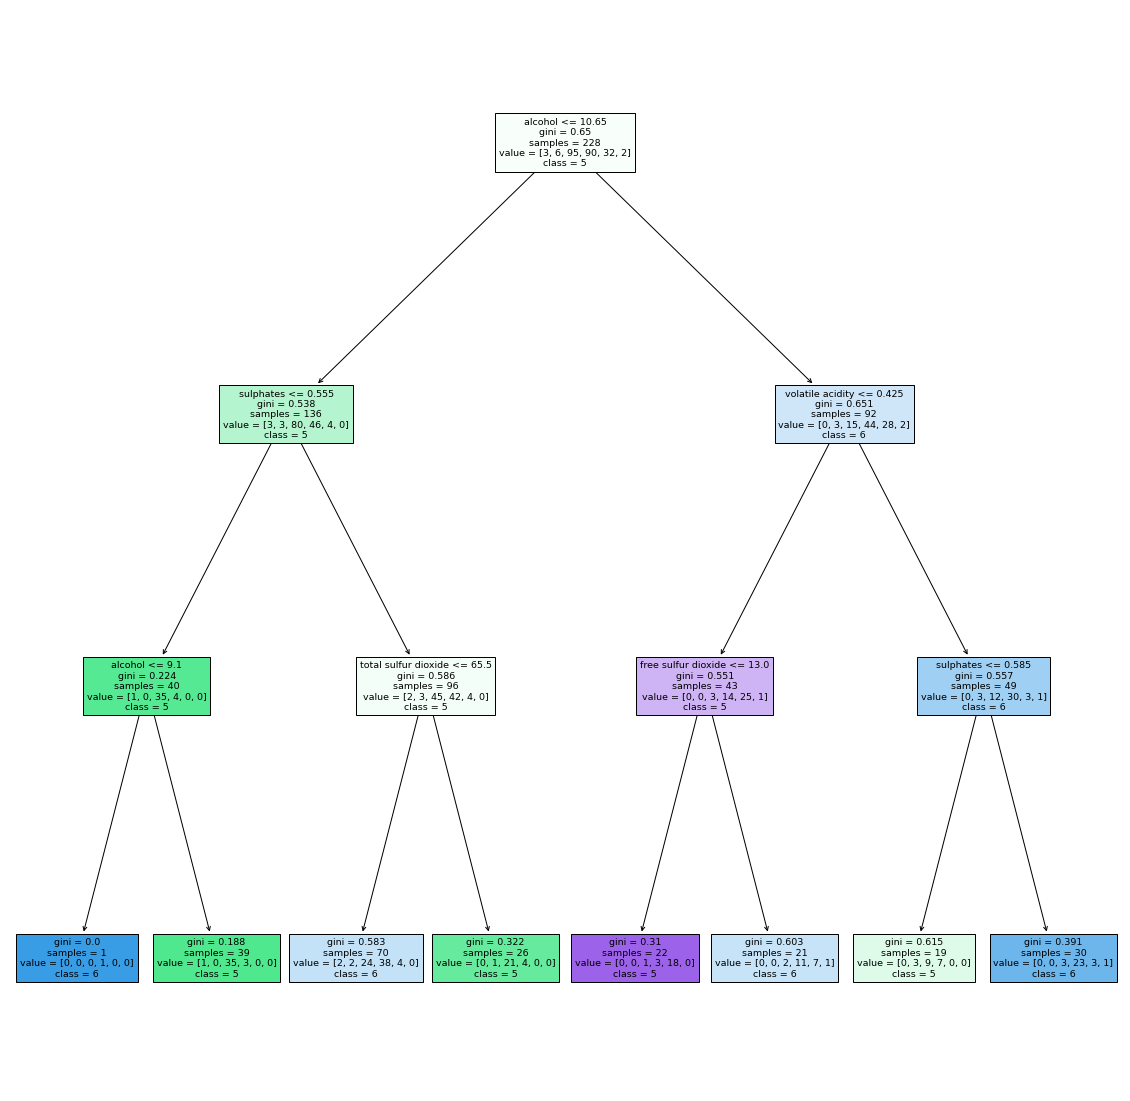

In [ ]:
y_data = y_data.astype(str)
fig = plt.figure(figsize=(20, 20))
tree.plot_tree(arbol, feature_names = list(x_data.columns.values), class_names = list(y_data.values), filled = True)
plt.show()

In [ ]:
#Mostramos las características importantes que influyeron el las decisiones del árbol

for i in range(x_train.columns.shape[0]):
  print(x_train.columns[i],":",arbol.feature_importances_[i])

fixed acidity : 0.0
volatile acidity : 0.18184129214552586
citric acid : 0.0
residual sugar : 0.0
chlorides : 0.0
free sulfur dioxide : 0.08591545678931098
total sulfur dioxide : 0.144462516192871
density : 0.0
pH : 0.0
sulphates : 0.24283890909465608
alcohol : 0.34494182577763605
Id : 0.0


In [ ]:
#@title Guardar el modelo de predicción entrenado usando dump
from joblib import dump, load
dump(arbol, 'modelo_DecisionTree_Vino.joblib')
!ls 

modelo_DecisionTree_Vino.joblib  sample_data  WineQT.csv


# ***D*** - Evaluación

## **Problemas de clasificación**

In [ ]:
print(accuracy_score(y_test,y_predict)) #0.5628415300546448 - Tenemos un porcentaje del 56.28% de elementos correctamente clasificados
y_predict #Haremos una predicción

0.5628415300546448


array([6, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6, 6,
       5, 6, 6, 6, 5, 6, 6, 6, 5, 6, 7, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6,
       6, 6, 7, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6, 6,
       5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 6, 6, 7, 7, 5, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6,
       5, 6, 6, 7, 5, 5, 6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 7, 5, 6, 6, 6, 5, 7, 5, 6,
       5, 6, 5, 7, 7, 6, 6, 7, 5, 6, 7, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 7, 5, 6, 5, 6,
       6, 6, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 6, 7, 6, 6, 5, 6, 6, 6, 5, 6, 7, 5,
       5, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 6,
       5, 6, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6,

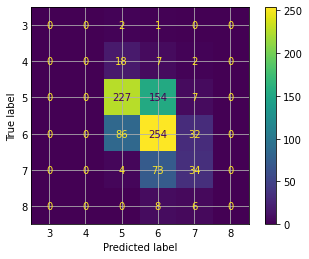

In [ ]:
#Hacemos una matriz de confusión para visualizar el desempeño del algoritmo.
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

## **Problemas de regresión**

In [ ]:
arbol = DecisionTreeRegressor(criterion = 'squared_error', max_depth=8)
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.80)
arbol.fit(x_train,y_train)
y_predict = arbol.predict(x_test)

### **Error cuadrático medio**

In [ ]:
print(mean_squared_error(y_predict, y_test)) #Vino

0.5551912568306011


### **Error absoluto medio**

In [ ]:
print(mean_absolute_error(y_predict, y_test))#Vino

0.4743169398907104


### **Representación gráfica**

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


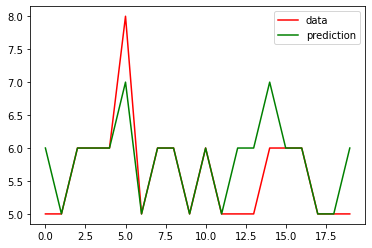

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[:20], c='r', label = 'data')
plt.plot(A,y_predict[:20], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


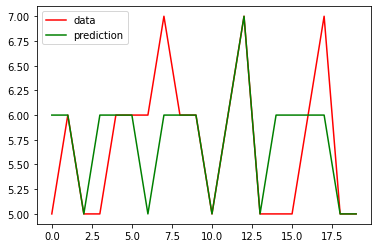

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[20:40], c='r', label = 'data')
plt.plot(A,y_predict[20:40], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


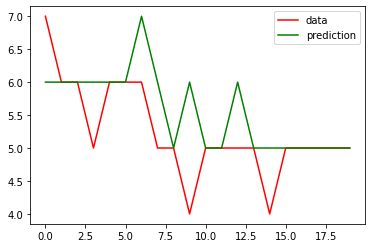

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[40:60], c='r', label = 'data')
plt.plot(A,y_predict[40:60], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()



---

# **E** - Optimización de hiperparámetros

## **Combinación de parámetros óptima**

## Calcula la combinación de parámetros óptima (uniform o distance; valor de k). Para ello realiza ejecuciones con cada uno de los valores uniform y distance para los valores de k desde 1 a 30.

In [ ]:
#Cada ejecución anterior se deberá hacer usando validación cruzada (por ejemplo n_splits =5).
#Con ello obtendremos una medida de bondad del modelo (accuracy_score o mean_absolute_error)),
#como lo ejecutaremos 5 veces, calcularemos la media de esas 5 ejecuciones.

opt_gini = 0
opt_entropy = 0
k_opt_gini = 1
k_opt_entropy = 1

for i in range(1,15):
  k = i
  w1 = 'gini'
  w2 = 'entropy'

  resultados_prob = []
  kf = KFold(n_splits=5) #Indicamos que se repetirá 5 veces

  
  for train, test in kf.split(x_train):
    model = DecisionTreeClassifier(criterion = w1, max_depth=i)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_gini = accuracy_score(y_test,y_predict)
    resultados_prob.append(porcentage_gini) #Guardamos el porcentaje para hacer la media y tener un menor margen de error
  media_prob = np.mean(resultados_prob)

  if media_prob > opt_gini:
    opt_gini = media_prob
    k_opt_gini = k
  
  resultados_prob.clear()
  media_prob = 0
  kf = KFold(n_splits=5)
  for train, test in kf.split(x_train): 
    model = DecisionTreeClassifier(criterion = w2, max_depth=i)
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    porcentage_entropy = accuracy_score(y_test,y_predict)
    resultados_prob.append(porcentage_entropy)
  media_prob = np.mean(resultados_prob)
  if media_prob > opt_entropy:
    opt_entropy = media_prob
    k_opt_entropy = k
  resultados_prob.clear()
  media_prob = 0

In [ ]:
#Imprimimos la mejor combinación tanto uniform/distance que tenemos a la hora de tener en cuenta el numero K
print(k_opt_gini)
k_opt_entropy

4


4

### Imprimimos la probabilidad de acierto tanto de uniform como distance

In [ ]:
opt_gini

0.5676502732240437

In [ ]:
opt_entropy

0.5565027322404372

## Parámetros óptimos obtenidos

In [ ]:
#aplicamos los datos obtenidos al problema en cuestión
modelo_final = DecisionTreeClassifier(criterion = 'gini', max_depth=4)
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, random_state=1, test_size=0.75)
modelo_final.fit(x_train, y_train)
y_predict = modelo_final.predict(x_test)
porcentage = accuracy_score(y_test, y_predict)

# Error cuadrático medio
squared_error = mean_squared_error(y_test, y_predict)
# Error absoluto medio
absolute_error = mean_absolute_error(y_test, y_predict)

print('Estos son los resultados')
print('------------------------')
print('Porcentaje: ', round(porcentage,4))
print('Error cuadrático medio: ', round(squared_error,2))
print('Error absoluto medio: ', round(absolute_error,2))

Estos son los resultados
------------------------
Porcentaje:  0.5629
Error cuadrático medio:  0.61
Error absoluto medio:  0.49


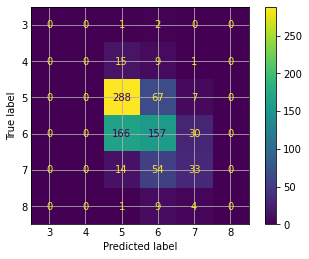

In [ ]:
#Volvemos hacer una matriz de confusión para ver el desempeño del algoritmo
ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


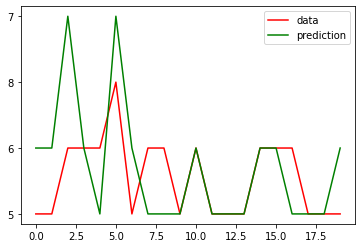

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[:20], c='r', label = 'data')
plt.plot(A,y_predict[:20], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


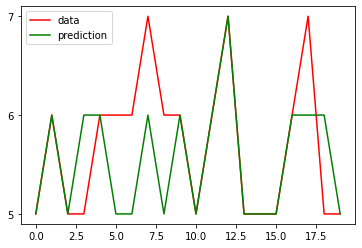

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[20:40], c='r', label = 'data')
plt.plot(A,y_predict[20:40], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


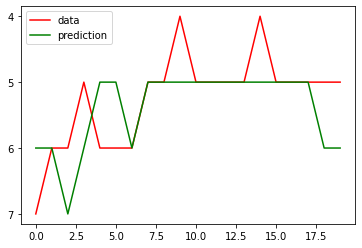

In [ ]:
A = np.stack(i for i in range(20))
plt.plot(A,y_test[40:60], c='r', label = 'data')
plt.plot(A,y_predict[40:60], c='g', label = 'prediction')
plt.axis('tight')
plt.legend()
plt.show()

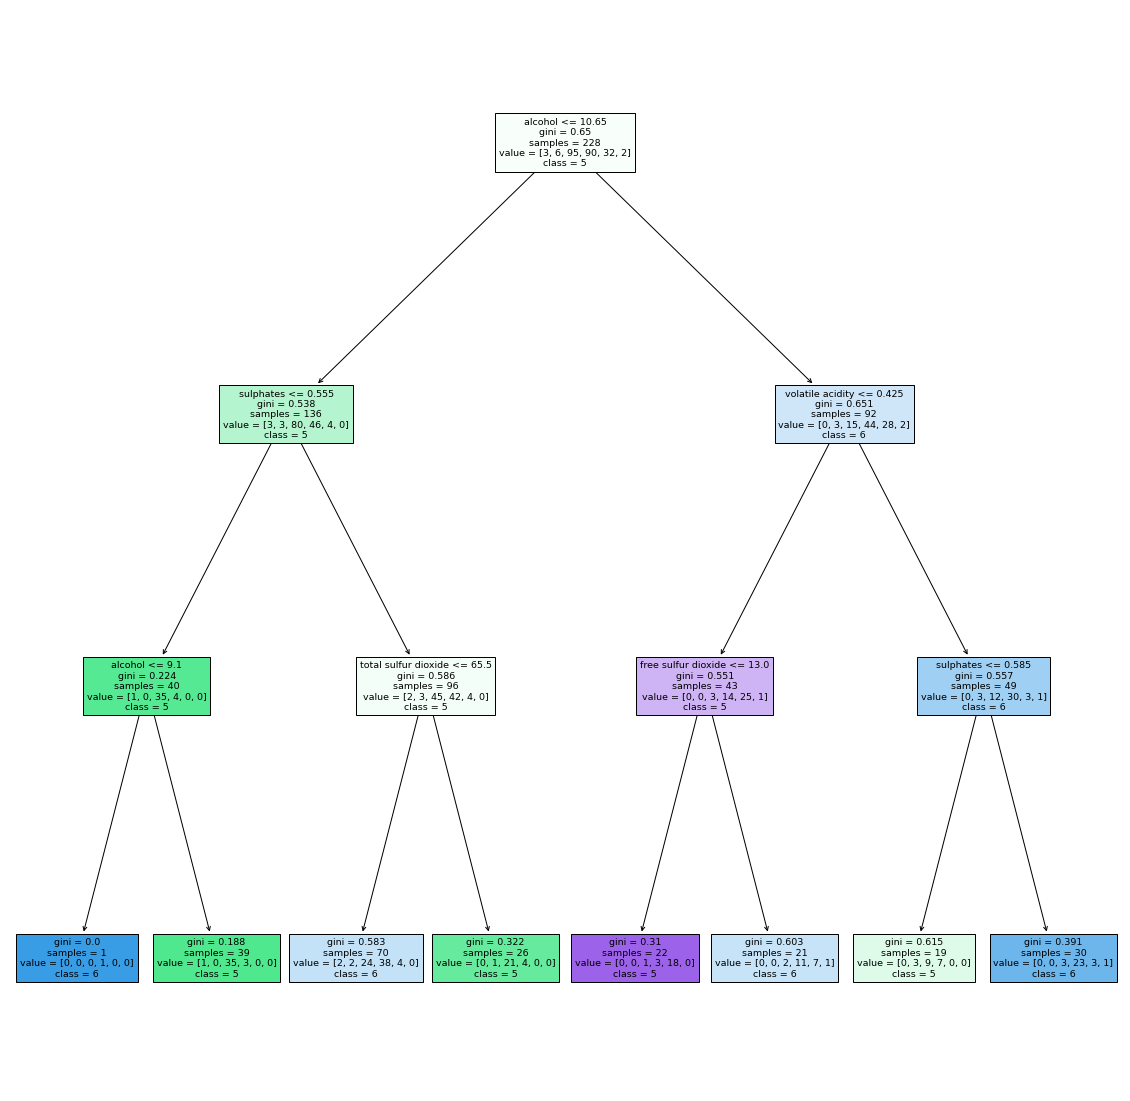

In [ ]:
y_data = y_data.astype(str)
fig = plt.figure(figsize=(20, 20))
tree.plot_tree(arbol, feature_names = list(x_data.columns.values), class_names = list(y_data.values), filled = True)
plt.show()